In [109]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

In [110]:
# 读取PM2.5在各IAQI区间的时间段数
data_dir=r'E:\Projects\OneDrive - somebottle\文档Documents\大数据分析Spark\期末大作业\analyses\pm25_iaqi_count'
# 筛选出所有CSV文件
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
df=None
for i in csv_files:
    path=os.path.join(data_dir,i)
    df_rd=pd.read_csv(path)
    if df is None:
        df=df_rd
    else:
        df=pd.concat([df,df_rd])
df.reset_index(drop=True,inplace=True) # 重置索引
df

,IAQI,COUNT
0,0,243
1,50,14973
2,100,3886
3,150,292
4,200,36
5,300,2
6,400,0
7,500,0


In [147]:
# 计算每个 IAQI 区间中COUNT所占总数的比例
total_count = df['COUNT'].sum()
df['RATIO'] = df['COUNT'] / total_count
df['PERCENTAGE'] = (df['RATIO']*100).map('{:.2f}%'.format)

In [148]:
df_filtered=df[df['COUNT']>0] # 过滤掉空值行
# 按照计数列升序排序，这是为了后面绘图时的explode处理
df_filtered.sort_values(by='COUNT',ascending=True,inplace=True)

C:\Users\58379\AppData\Local\Temp\ipykernel_21648\3468949233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by='COUNT',ascending=True,inplace=True)


In [113]:
df_filtered

,IAQI,COUNT,RATIO,PERCENTAGE
5,300,2,0.000103,0.01%
4,200,36,0.001853,0.19%
0,0,243,0.012505,1.25%
3,150,292,0.015027,1.50%
2,100,3886,0.199979,20.00%
1,50,14973,0.770533,77.05%


In [145]:
explode=list(
    map(
        lambda x:x/10,
        list(range(df_filtered.shape[0]*2,0,-2))
    )
)
explode

[1.2, 1.0, 0.8, 0.6, 0.4, 0.2]

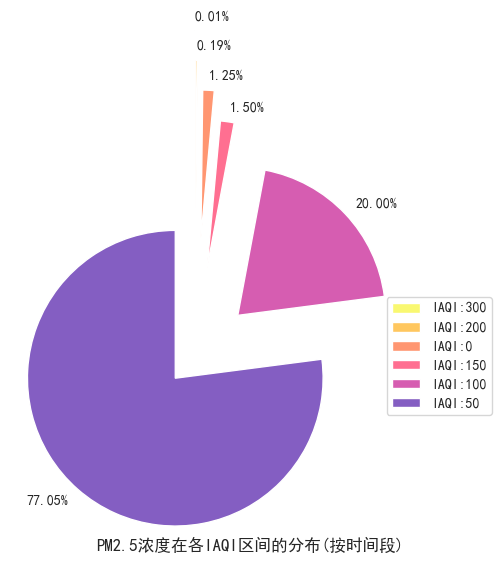

In [146]:
plt.pie(
    df_filtered['RATIO'],
    labels=df_filtered["PERCENTAGE"],
    startangle=90,
    counterclock=False,
    explode=explode,
    colors=['#F9F871','#FFC75F','#FF9671','#FF6F91','#D65DB1','#845EC2']
)

# 在图例中显示标签
plt.legend(
    labels=df_filtered["IAQI"].map('IAQI:{}'.format),
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)
plt.title('PM2.5浓度在各IAQI区间的分布(按时间段)',x=0.65,y=-0.05)
plt.show()